# 3 Differentiation in PyTorch

In [1]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = 2
y= x**2
y

4

### Install CPU only version

# Derivative

### y = x**2

In [3]:
x = torch.tensor(2.0,requires_grad = True)
y = x**2
y.backward() # backward function calculates the derivative of y

In [4]:
x.grad

tensor(4.)

### y=x**3+7*x**2-8*x

In [5]:
x=torch.tensor(2.0,requires_grad = True)
y=x**3 + 7*x**2 - 8*x
y.backward()

In [6]:
x.grad

tensor(32.)

In [7]:
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214

# Partial derivatives
NOTE: Calculating derivatives w.r.t one values

f(u = 1, v =2) = uv + u**2

In [8]:
u=torch.tensor(1.0,requires_grad = True)
v=torch.tensor(2.0,requires_grad = True)
f = u*v+ u**2
f.backward() # backward function calculates the derivative of f at u & v and evaluats at value u=1 and v=2

In [9]:
print("The partial derivative with respect to u: ", u.grad)
u.grad

The partial derivative with respect to u:  tensor(4.)


tensor(4.)

In [10]:
print("The partial derivative with respect to v: ", v.grad)
v.grad

The partial derivative with respect to v:  tensor(1.)


tensor(1.)

# Calculating the derivative w.r.t multiple values
NOTE: Calculating derivatives of function Y =  x**2 w.r.t  x at 100's of values ( 100 Values between -10 to 10)

#### Hint:  You use the sum trick to produce a scalar valued function and then take the gradient:

In [11]:
x = torch.linspace(-3,3,100, requires_grad = True)
Y =  x**2
y = torch.sum(x**2) # Use the sum to produce a scalar valued function
y.backward()
x.grad

tensor([-6.0000, -5.8788, -5.7576, -5.6364, -5.5152, -5.3939, -5.2727, -5.1515,
        -5.0303, -4.9091, -4.7879, -4.6667, -4.5455, -4.4242, -4.3030, -4.1818,
        -4.0606, -3.9394, -3.8182, -3.6970, -3.5758, -3.4545, -3.3333, -3.2121,
        -3.0909, -2.9697, -2.8485, -2.7273, -2.6061, -2.4848, -2.3636, -2.2424,
        -2.1212, -2.0000, -1.8788, -1.7576, -1.6364, -1.5152, -1.3939, -1.2727,
        -1.1515, -1.0303, -0.9091, -0.7879, -0.6667, -0.5455, -0.4242, -0.3030,
        -0.1818, -0.0606,  0.0606,  0.1818,  0.3030,  0.4242,  0.5455,  0.6667,
         0.7879,  0.9091,  1.0303,  1.1515,  1.2727,  1.3939,  1.5152,  1.6364,
         1.7576,  1.8788,  2.0000,  2.1212,  2.2424,  2.3636,  2.4848,  2.6061,
         2.7273,  2.8485,  2.9697,  3.0909,  3.2121,  3.3333,  3.4545,  3.5758,
         3.6970,  3.8182,  3.9394,  4.0606,  4.1818,  4.3030,  4.4242,  4.5455,
         4.6667,  4.7879,  4.9091,  5.0303,  5.1515,  5.2727,  5.3939,  5.5152,
         5.6364,  5.7576,  5.8788,  6.00

### The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.

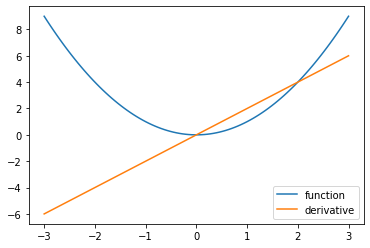

In [12]:
plt.plot(x.detach().numpy(), Y.detach().numpy(),label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.legend()

# Use of detach

In [13]:
print(torch.ones(10))
print(torch.ones(3, 2))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [14]:
#Not using detach()
x=torch.ones(3,2, requires_grad=True)

y=x**2
z=x**4

r=(y+z).sum()
r.backward()
print(x.grad)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]])


In [15]:
#Using detach()
x=torch.ones(10, requires_grad=True)

y=x**2
z=x.detach()**4 # Using detact

r=(y+z).sum()
r.backward()

print(x.grad)

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


In [37]:
#Situation when we are using detach()
x=torch.ones(10, requires_grad=True)

y=x.detach()**2
z=x**3

r=(y+z).sum()
r.backward()

print(x.grad)

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])


# Derivative of Relu

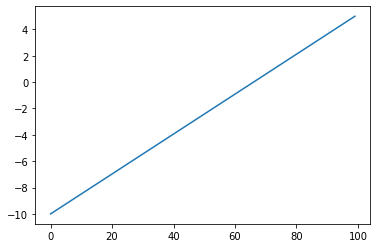

In [46]:
x = torch.linspace(-10, 5, 100, requires_grad = True)
plt.plot(x.detach().numpy(),label = 'function')

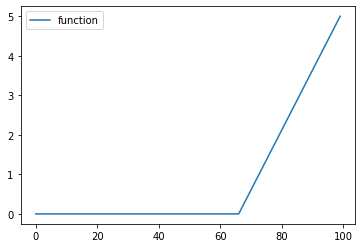

In [47]:
Y = torch.relu(x)
plt.plot(Y.detach().numpy(),label = 'function')
plt.legend()

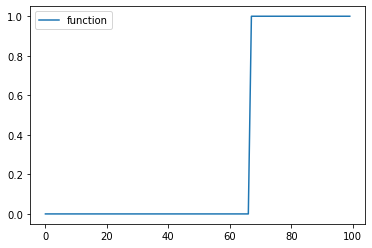

In [48]:
y =  Y.sum()
y.backward()
x.grad
plt.plot(x.grad.detach().numpy(),label = 'function')
plt.legend()

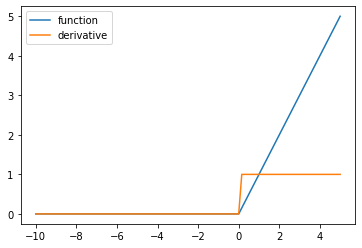

In [49]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.legend()

# Derivative of sigmoid

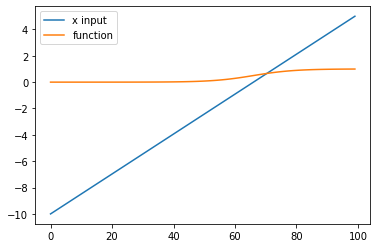

In [61]:
x = torch.linspace(-10, 5, 100, requires_grad = True)
Y = torch.sigmoid(x)
plt.plot(x.detach().numpy(),label = 'x input')
plt.plot(Y.detach().numpy(),label = 'function')
plt.legend()

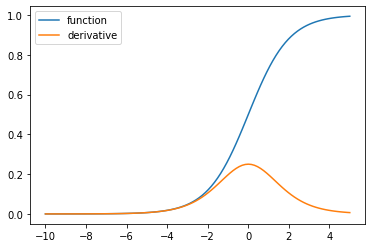

In [62]:
y =  Y.sum()
y.backward()
x.grad
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.legend()